In [1]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
##from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily

Red: https://deepnote.com/@siew-sook-yan/Python-Retrieving-OpenStreetMap-data-with-OSMNX-NIFhR_zARQm2jYqcctP5hg

In [2]:
pioneer_valley = ['Hampshire County, Massachusetts, USA', 'Hampden County, Massachusetts, USA', 'Leverett, Massachusetts, USA','Sunderland, Massachusetts, USA', 'Whately, Massachusetts, USA']#, 'Franklin County, Massachusetts, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
graph = ox.graph_from_place(pioneer_valley, network_type='drive')
area = ox.geocode_to_gdf(pioneer_valley)

In [3]:
print(type(graph))
print(type(area))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [4]:
bstops = ox.geometries_from_place(pioneer_valley, tags={'highway':'bus_stop','amenity':'bus_station'})

In [5]:
bstops.network.unique()

array(['PVTA', nan, 'Pioneer Valley Transit Authority', 'FRTA', 'PVTA 33'],
      dtype=object)

In [6]:
# Retrieve nodes and edges
intxns, streets = ox.graph_to_gdfs(graph)

In [7]:
bus_network_extent = bstops.unary_union.envelope
b = bstops.total_bounds

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


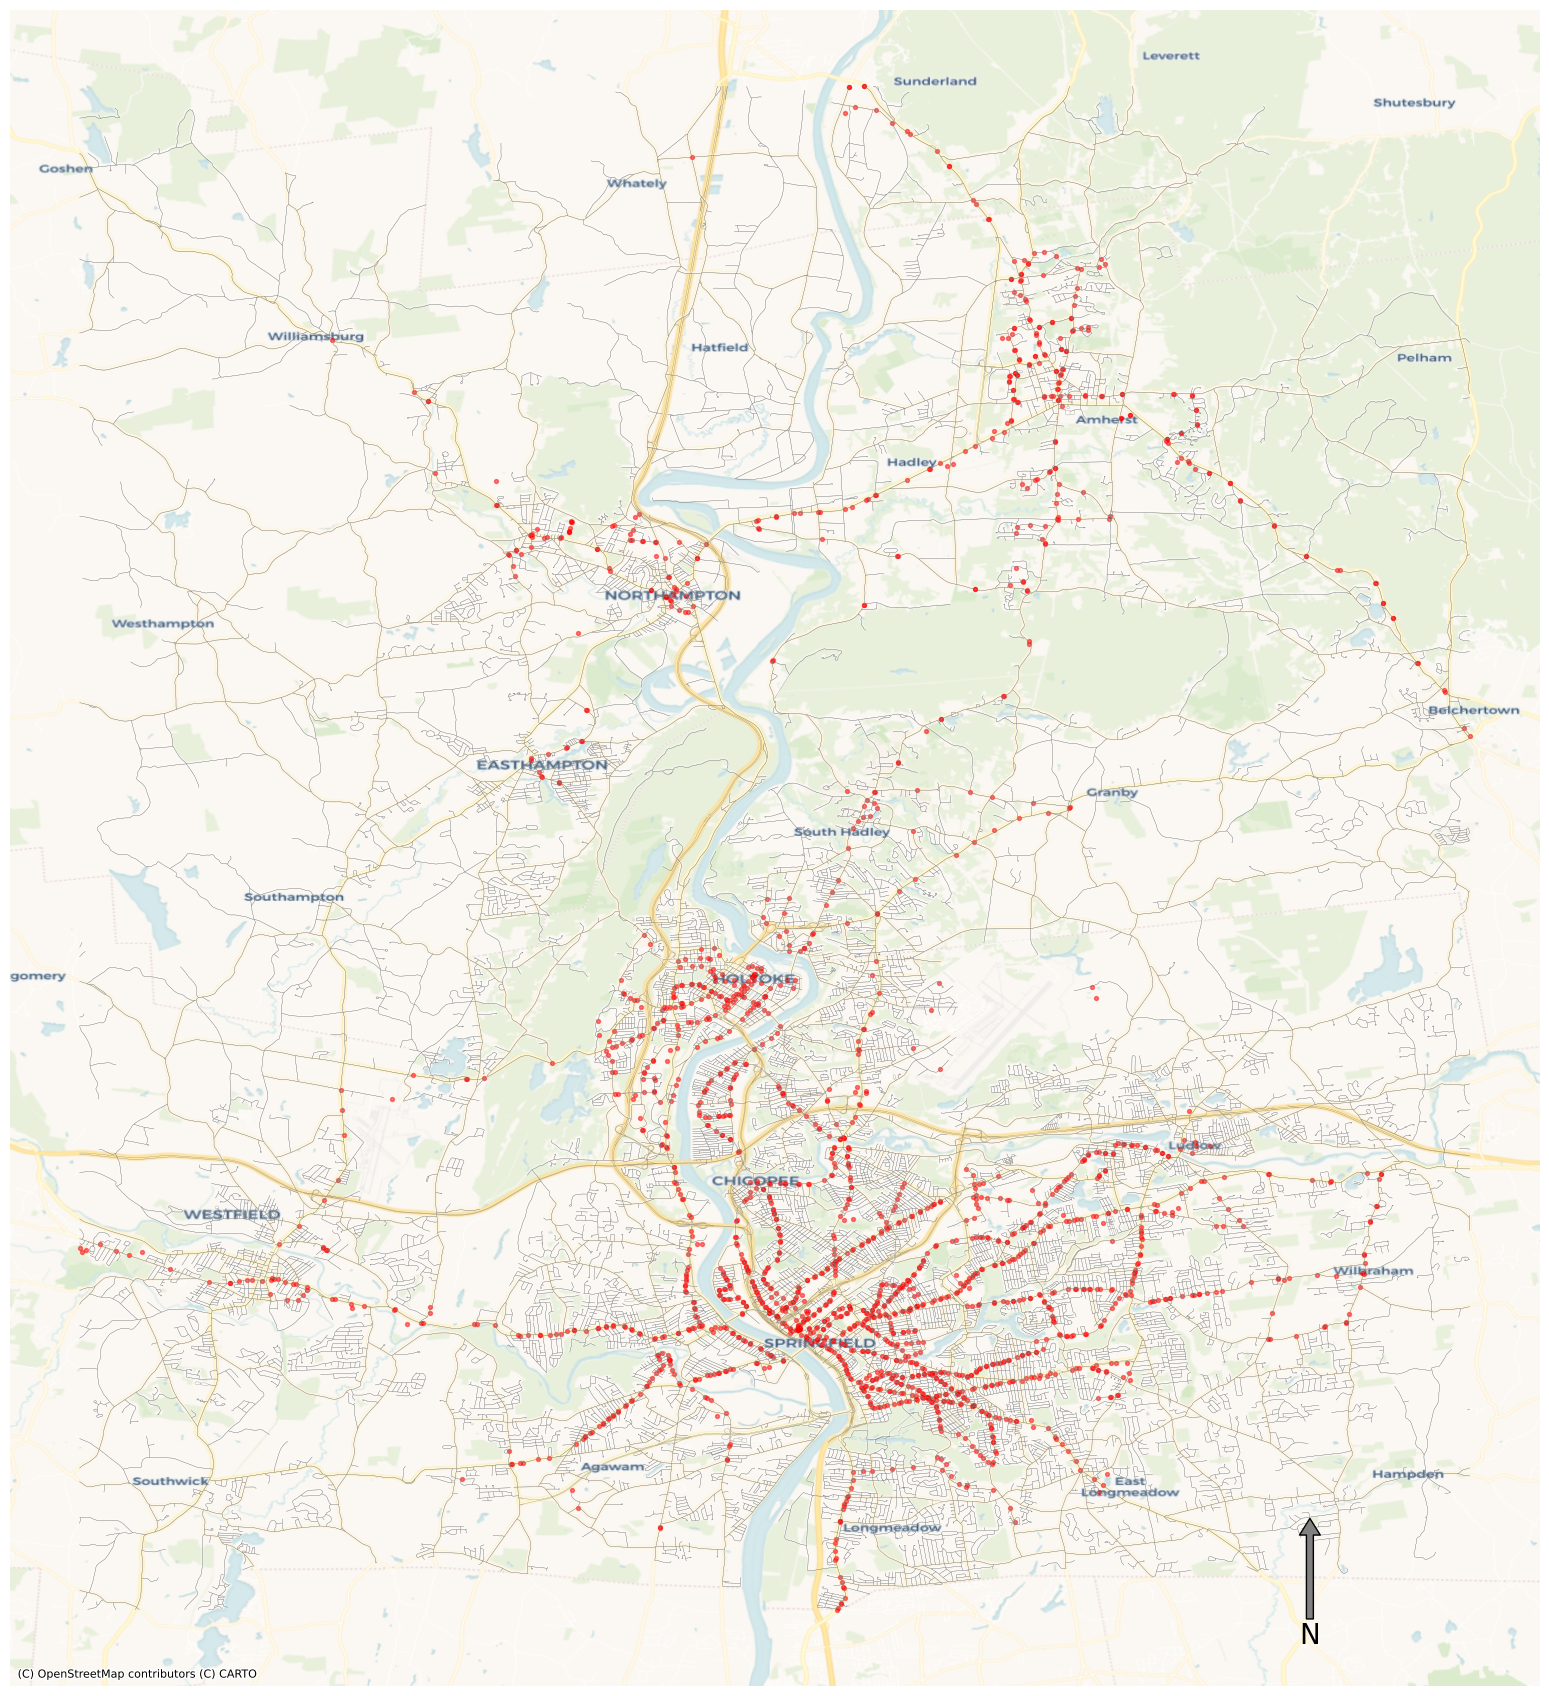

In [8]:
#STREETS
fig, ax = plt.subplots(figsize=(16,18))
#area.plot(ax=ax, facecolor='.9',alpha=.3)
streets_clipped = streets.clip(bus_network_extent)
streets_clipped.plot(ax=ax, linewidth=.2, edgecolor='gray')
bstops.plot(ax=ax, color='red', alpha=.5, markersize=8)
src = contextily.providers.CartoDB.Voyager
#contextily.add_basemap(ax=ax, source=contextily.providers.CartoDB.Positron,  crs=streets.crs, zoom=11)
contextily.add_basemap(ax=ax, source=src,  crs=streets.crs, zoom=12)
#img, img_ext = contextily.bounds2img(b[0], b[1], b[2], b[3], ll=True,source=src)
plt.tight_layout()
ax.axis('off')
#Add north arrow, https://stackoverflow.com/a/58110049/604456
x, y, arrow_length = 0.85, 0.10, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='gray', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

#ax.imshow(img, interpolation='bilinear')#, extent = img_ext)
#plt.savefig('../figures/pv-bus-streets.png',dpi=120)
fig.savefig(r'../../figures/pv-bus-streets.png', dpi=400, bbox_inches='tight')

In [8]:
bstops = ox.geometries_from_place(pioneer_valley, tags={'highway':'bus_stop','amenity':'bus_station'})

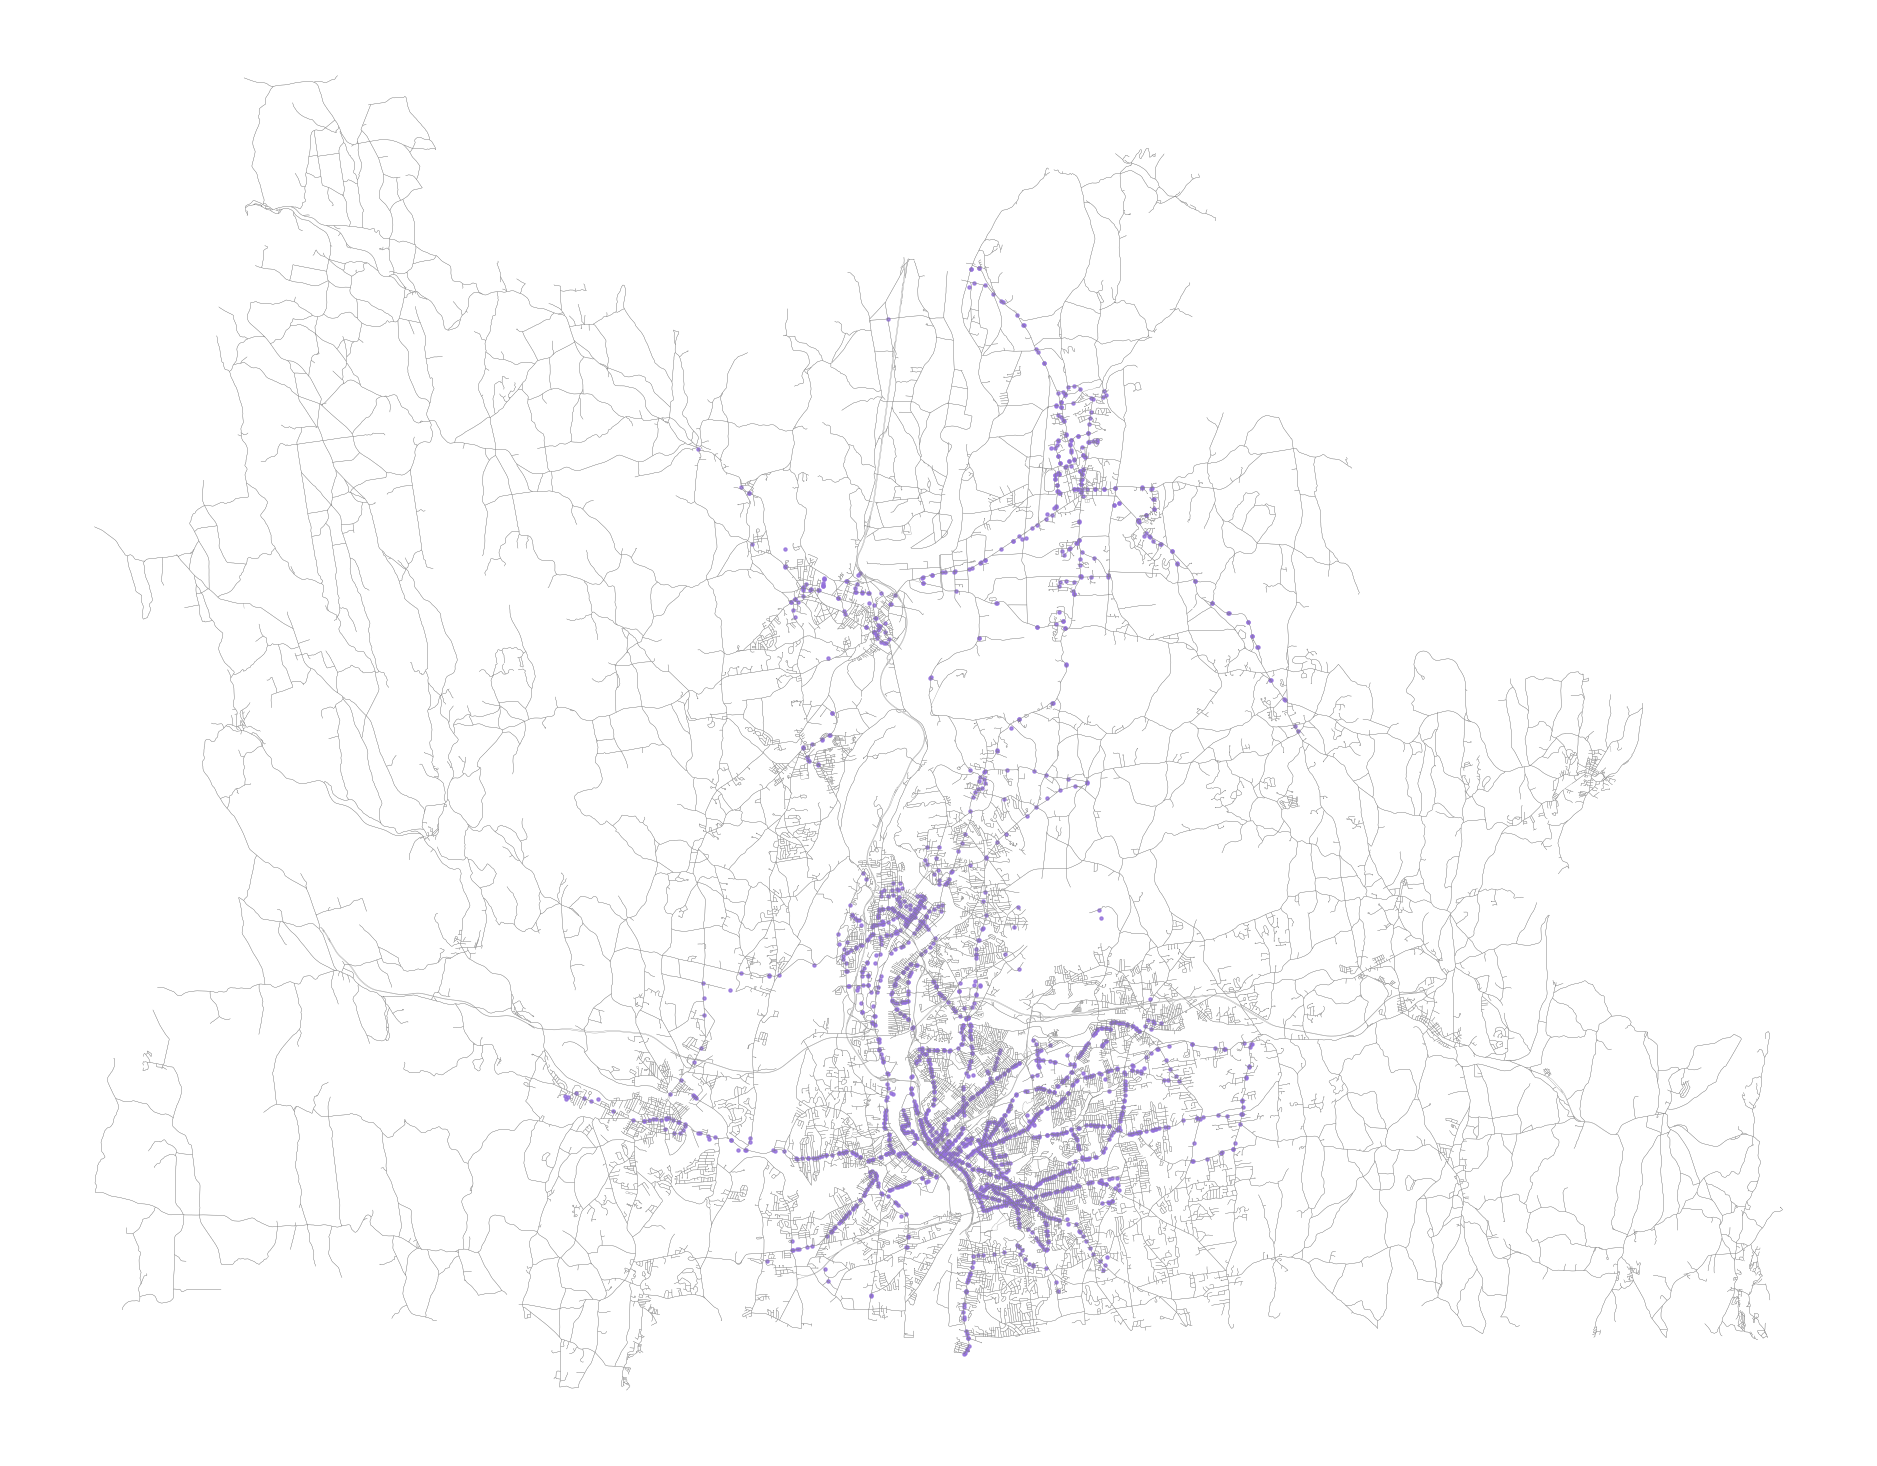

In [9]:
#STREETS
fig, ax = plt.subplots(figsize=(20,15))
#area.plot(ax=ax, facecolor='.9',alpha=.3)
#streets_clipped = streets.clip(bus_network_extent)
bstops.plot(ax=ax, color='mediumpurple', alpha=.8, markersize=5)
#streets_clipped.plot(ax=ax, linewidth=.2, edgecolor='k')
#streets_clipped = streets.clip(bus_network_extent)
#streets_clipped.plot(ax=ax, linewidth=.2, edgecolor='gray')
streets.plot(ax=ax, linewidth=.2, edgecolor='gray')
plt.tight_layout()
ax.axis('off')
fig.savefig(r'../../figures/pv-bus-streets2.png', dpi=300, bbox_inches='tight')